# 台灣發電量年資料分析

這份 Notebook 展示如何使用 Python 分析與視覺化台灣「發電量年資料」。

**主要步驟**：
1. 載入套件
2. 資料下載與讀取
3. 資料檢視
4. 折線圖與堆疊圖視覺化
5. 互動式柱狀圖與圓餅圖

## 1. 載入套件

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from ipywidgets import Output
from IPython.display import display

## 2. 下載與讀取資料
政府資料開放平台-[發電量年資料](<https://data.gov.tw/dataset/16481>)
/[資料集](<https://quality.data.gov.tw/dq_download_csv.php?nid=16481&md5_url=2f75965a69d71fbc5a15a128b36d84c8>)

In [2]:
url = 'https://quality.data.gov.tw/dq_download_csv.php?nid=16481&md5_url=2f75965a69d71fbc5a15a128b36d84c8'
df = pd.read_csv(url, encoding='utf-8')


## 3. 資料檢視

In [3]:
# 檢視資料
df.head()

,日期(年),單位,總發電量_全國,抽蓄水力_全國,火力_全國,火力_燃煤_全國,火力_燃油_全國,火力_燃氣_全國,核能_全國,再生能源_全國,...,火力_燃煤_自用發電設備,火力_燃油_自用發電設備,火力_燃氣_自用發電設備,再生能源_自用發電設備,再生能源_慣常水力_自用發電設備,再生能源_地熱_自用發電設備,再生能源_太陽光電_自用發電設備,再生能源_風力_自用發電設備,再生能源_生質能_自用發電設備,再生能源_廢棄物_自用發電設備
0,2003,百萬度,209072.387105,3860.536136,160110.537864,112335.397741,19413.985291,28361.154832,38891.5746,6209.738505,...,28418.758882,5397.718545,1015.767252,3165.413250,0.0,0.0,0.461,13.952795,394.253555,2756.745900
1,2004,百萬度,218396.631892,3345.689424,168975.889667,115331.464027,17485.681331,36158.744309,39490.0650,6584.987801,...,32252.609003,6102.260024,902.699211,3362.288716,0.0,0.0,0.584,12.422907,348.523683,3000.758126
2,2005,百萬度,227512.250072,3838.518250,176160.778876,120044.189019,17200.781670,38915.808187,39972.0080,7540.944946,...,32302.759867,6281.208863,504.683330,3392.576589,0.0,0.0,0.960,14.305665,323.477933,3053.832991
3,2006,百萬度,235530.125508,3910.666721,184005.112584,124048.803465,19846.587052,40109.722067,39870.4978,7743.848403,...,33063.991984,5381.584308,494.754002,3391.154540,0.0,0.0,1.457,11.731636,321.292219,3056.673685
4,2007,百萬度,243116.583951,3932.701260,190319.910767,128462.814509,16823.862699,45033.233559,40539.1600,8324.811924,...,35462.458016,4625.381745,754.755704,3477.897091,0.0,0.0,2.180,10.169579,302.267458,3163.280054


In [4]:
# 欄位列表
df.columns.tolist()

['日期(年)',
 '單位',
 '總發電量_全國',
 '抽蓄水力_全國',
 '火力_全國',
 '火力_燃煤_全國',
 '火力_燃油_全國',
 '火力_燃氣_全國',
 '核能_全國',
 '再生能源_全國',
 '再生能源_慣常水力_全國',
 '再生能源_地熱_全國',
 '再生能源_太陽光電_全國',
 '再生能源_風力_全國',
 '再生能源_生質能_全國',
 '再生能源_廢棄物_全國',
 '總發電量_台電',
 '抽蓄水力_台電',
 '火力_台電',
 '火力_燃煤_台電',
 '火力_燃油_台電',
 '火力_燃氣_台電',
 '核能_台電',
 '再生能源_台電',
 '再生能源_慣常水力_台電',
 '再生能源_地熱_台電',
 '再生能源_太陽光電_台電',
 '再生能源_風力_台電',
 '總發電量_民營電廠',
 '火力_民營電廠',
 '火力_燃煤_民營電廠',
 '火力_燃氣_民營電廠',
 '再生能源_民營電廠',
 '再生能源_慣常水力_民營電廠',
 '再生能源_地熱_民營電廠',
 '再生能源_太陽光電_民營電廠',
 '再生能源_風力_民營電廠',
 '總發電量_自用發電設備',
 '火力_自用發電設備',
 '火力_燃煤_自用發電設備',
 '火力_燃油_自用發電設備',
 '火力_燃氣_自用發電設備',
 '再生能源_自用發電設備',
 '再生能源_慣常水力_自用發電設備',
 '再生能源_地熱_自用發電設備',
 '再生能源_太陽光電_自用發電設備',
 '再生能源_風力_自用發電設備',
 '再生能源_生質能_自用發電設備',
 '再生能源_廢棄物_自用發電設備']

In [5]:
# 確認資料型別與缺值
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 49 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   日期(年)             21 non-null     int64  
 1   單位                21 non-null     object 
 2   總發電量_全國           21 non-null     float64
 3   抽蓄水力_全國           21 non-null     float64
 4   火力_全國             21 non-null     float64
 5   火力_燃煤_全國          21 non-null     float64
 6   火力_燃油_全國          21 non-null     float64
 7   火力_燃氣_全國          21 non-null     float64
 8   核能_全國             21 non-null     float64
 9   再生能源_全國           21 non-null     float64
 10  再生能源_慣常水力_全國      21 non-null     float64
 11  再生能源_地熱_全國        21 non-null     float64
 12  再生能源_太陽光電_全國      21 non-null     float64
 13  再生能源_風力_全國        21 non-null     float64
 14  再生能源_生質能_全國       21 non-null     float64
 15  再生能源_廢棄物_全國       21 non-null     float64
 16  總發電量_台電           21 non-null     float64
 17 

## 4. 資料視覺化

### 台灣各能源類型發電量趨勢
1. 台灣最主要的方式是火力發電
2. 近幾年來再生能源的比例逐漸上升
3. 核能有下降的趨勢，可能與近年反核有關
4. 抽蓄水力不歸類在再生，因其是花離峰時間的電恢復水的位能

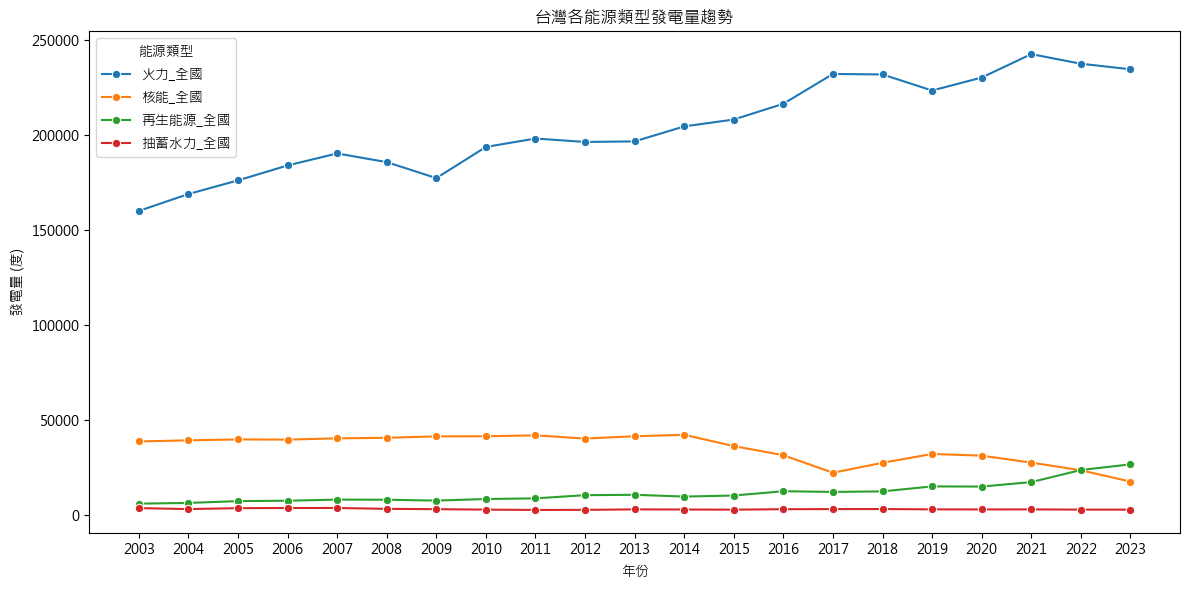

In [6]:
plt.rcParams['font.family'] = 'Microsoft JhengHei'
plt.rcParams['axes.unicode_minus'] = False
cols = ['火力_全國', '核能_全國', '再生能源_全國', '抽蓄水力_全國']
df_m = df[['日期(年)'] + cols].melt(id_vars='日期(年)', var_name='能源類型', value_name='發電量')
plt.figure(figsize=(12,6))
sns.lineplot(data=df_m, x='日期(年)', y='發電量', hue='能源類型', marker='o')
plt.title('台灣各能源類型發電量趨勢')
plt.xlabel('年份')
plt.ylabel('發電量 (度)')
plt.xticks(df['日期(年)'].tolist())  # 強制整數刻度
plt.legend(title='能源類型')
plt.tight_layout()
plt.show()

### 發電量堆疊圖
1. 觀察到燃油使用量有變少的趨勢
2. 太陽光電及風力有變多的趨勢

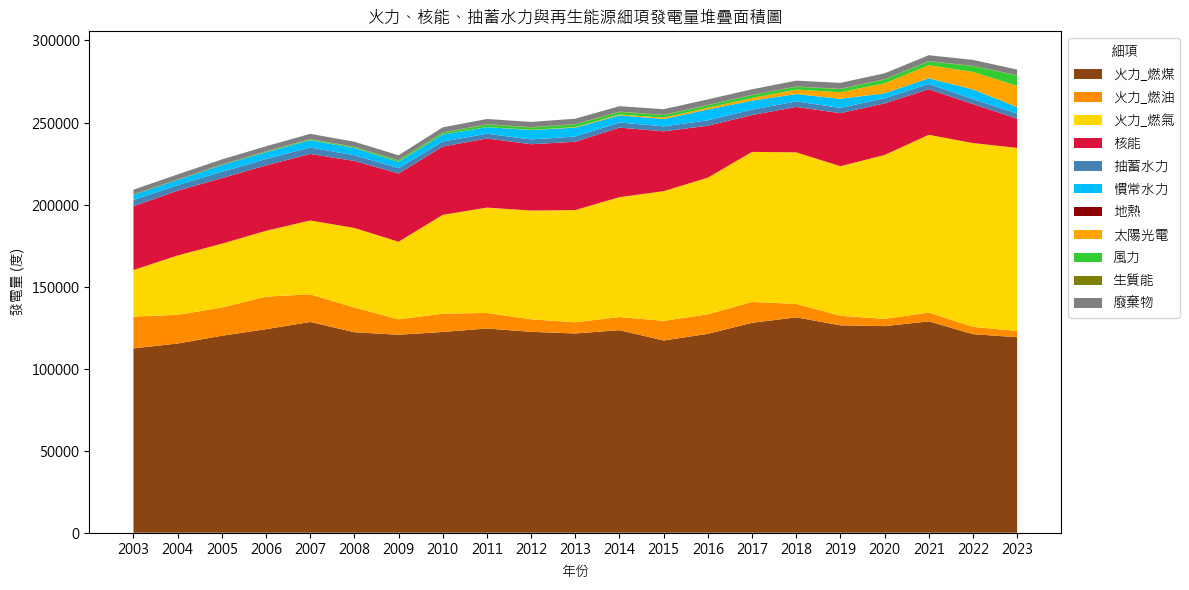

In [11]:
plt.rcParams['font.family'] = 'Microsoft JhengHei'
plt.rcParams['axes.unicode_minus'] = False
# 取火力、核能、抽蓄水力、再生能源細項欄位
fire_sub = ['火力_燃煤_全國','火力_燃油_全國','火力_燃氣_全國']
nuclear = ['核能_全國']
pumped = ['抽蓄水力_全國']
renew_sub = [
    '再生能源_慣常水力_全國','再生能源_地熱_全國',
    '再生能源_太陽光電_全國','再生能源_風力_全國',
    '再生能源_生質能_全國','再生能源_廢棄物_全國'
]
sub_cols = fire_sub + nuclear + pumped + renew_sub

# 自訂顏色列表：火力(褐橙黃)、核能(深紅)、抽蓄水力(藍)、再生能源細項(淺綠/橙綠)
colors = [
    'saddlebrown','darkorange','gold',  # 火力
    'crimson',                          # 核能
    'steelblue',                       # 抽蓄水力
    'deepskyblue','darkred','orange','limegreen','olive','gray'  # 再生
]

plt.figure(figsize=(12,6))
plt.stackplot(
    df['日期(年)'],
    [df[col] for col in sub_cols],
    labels=[c.replace('再生能源_','').replace('_全國','') for c in sub_cols],
    colors=colors
)
plt.legend(loc='upper left', bbox_to_anchor=(1,1), title='細項')
plt.title('火力、核能、抽蓄水力與再生能源細項發電量堆疊面積圖')
plt.xlabel('年份')
plt.ylabel('發電量 (度)')
plt.xticks(df['日期(年)'].tolist())
plt.tight_layout()
plt.show()

### 火力發電細項趨勢
1. 列出細項後發現相比於燃油的下降，天然氣成長的幅度反而更高
2. 但火力的主要來源還是煤礦

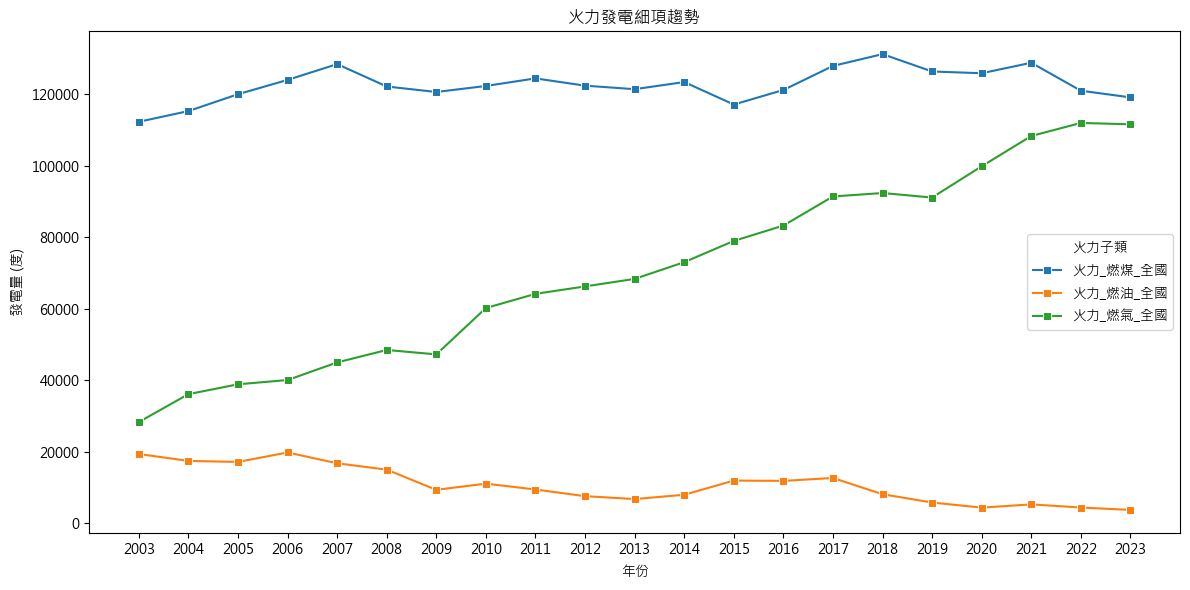

In [8]:
plt.rcParams['font.family'] = 'Microsoft JhengHei'
plt.rcParams['axes.unicode_minus'] = False
fire_cols = ['火力_燃煤_全國','火力_燃油_全國','火力_燃氣_全國']
plt.figure(figsize=(12,6))
df_fire = df[['日期(年)'] + fire_cols].melt(id_vars='日期(年)', var_name='子類型', value_name='發電量')
sns.lineplot(data=df_fire, x='日期(年)', y='發電量', hue='子類型', marker='s')
plt.title('火力發電細項趨勢')
plt.xlabel('年份')
plt.ylabel('發電量 (度)')
plt.xticks(df['日期(年)'])
plt.legend(title='火力子類')
plt.tight_layout()
plt.show()

### 再生能源細項趨勢

1. 太陽光電的成長的幅度十分多，從一開始的寥寥無幾，但現在遠遠領先其他種再生能源
2. 風力的成長也不差，逐漸成為再生發電中很大的占比
3. 慣常水力每年的波動都十分大，推測可能與該[年降雨](<https://gweb.wra.gov.tw/Hydroinfo/?id=Index#>)有所關係
4. 其他細項皆沒有太大變化，因此使再生能源發電量越來越多的是太陽能及風力

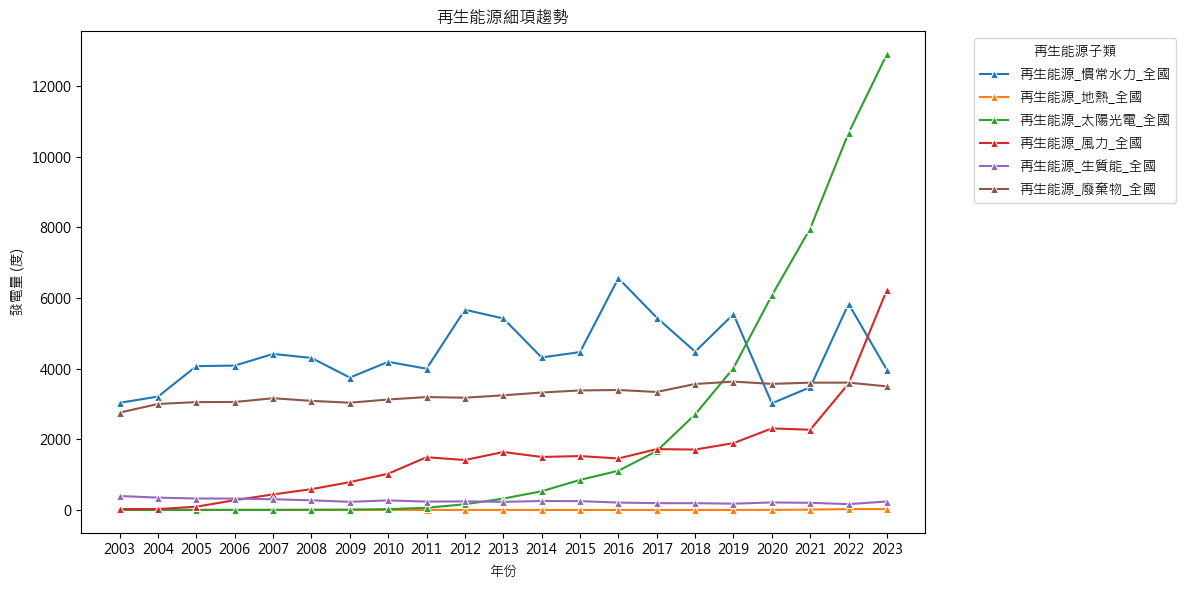

In [9]:
plt.rcParams['font.family'] = 'Microsoft JhengHei'
plt.rcParams['axes.unicode_minus'] = False
renew_cols = ['再生能源_慣常水力_全國','再生能源_地熱_全國','再生能源_太陽光電_全國','再生能源_風力_全國','再生能源_生質能_全國','再生能源_廢棄物_全國']
plt.figure(figsize=(12,6))
df_renew = df[['日期(年)'] + renew_cols].melt(id_vars='日期(年)', var_name='子類型', value_name='發電量')
sns.lineplot(data=df_renew, x='日期(年)', y='發電量', hue='子類型', marker='^')
plt.title('再生能源細項趨勢')
plt.xlabel('年份')
plt.ylabel('發電量 (度)')
plt.xticks(df['日期(年)'])
plt.legend(title='再生能源子類', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### 互動式圓餅圖
可透過選單生成該年度的發電組成圓餅圖   
點擊火力發電及再生能源可察看細項的圓餅圖

In [14]:
# 色彩設定
domain_colors = {'火力':'steelblue', '核能':'crimson', '再生能源':'forestgreen'}
sub_colors = {
    '火力_燃煤_全國':'saddlebrown', '火力_燃油_全國':'darkorange', '火力_燃氣_全國':'gold',
    '再生能源_慣常水力_全國':'deepskyblue','再生能源_地熱_全國':'darkred',
    '再生能源_太陽光電_全國':'orange','再生能源_風力_全國':'limegreen',
    '再生能源_生質能_全國':'olive','再生能源_廢棄物_全國':'gray'
}

years = df['日期(年)'].tolist()

def compute_props(year):
    row = df[df['日期(年)'] == year].iloc[0]
    props = {
        '火力': row['火力_全國'],
        '核能': row['核能_全國'],
        '再生能源': row['再生能源_全國']
    }
    total = sum(props.values())
    return {k: v / total * 100 for k, v in props.items()}

def format_label(k):
    return k.replace('再生能源_', '').replace('火力_', '').replace('_全國','')

# widgets
year_dd = widgets.Dropdown(options=years, description='年份:')
energy_dd = widgets.Dropdown(options=['火力', '再生能源'], description='主能源:')

main_fig_out = widgets.Output()
sub_fig_out = widgets.Output()

def update_main_fig(year):
    props = compute_props(year)
    labels = list(props.keys())
    values = list(props.values())
    colors = [domain_colors[k] for k in labels]

    fig = go.Figure(go.Pie(
        labels=labels, values=values,
        marker=dict(colors=colors),
        textinfo='label+percent',
        textposition='inside'
    ))
    fig.update_layout(title_text=f"{year} 能源發電佔比")
    main_fig_out.clear_output()
    with main_fig_out:
        fig.show()

def update_sub_fig(year, energy):
    if energy == '火力':
        keys = ['火力_燃煤_全國', '火力_燃油_全國', '火力_燃氣_全國']
    elif energy == '再生能源':
        keys = ['再生能源_慣常水力_全國', '再生能源_地熱_全國',
                '再生能源_太陽光電_全國', '再生能源_風力_全國',
                '再生能源_生質能_全國', '再生能源_廢棄物_全國']
    else:
        return

    row = df[df['日期(年)'] == year].iloc[0]
    vals = [row[k] for k in keys]
    labels = [format_label(k) for k in keys]
    colors = [sub_colors[k] for k in keys]

    fig = go.Figure(go.Pie(
        labels=labels, values=vals,
        marker=dict(colors=colors),
        textinfo='label+percent',
        textposition='inside'
    ))
    fig.update_layout(title_text=f"{year} {energy} 細項佔比")
    sub_fig_out.clear_output()
    with sub_fig_out:
        fig.show()

def on_change(change=None):
    update_main_fig(year_dd.value)
    update_sub_fig(year_dd.value, energy_dd.value)

year_dd.observe(on_change, names='value')
energy_dd.observe(on_change, names='value')

# 初始化顯示
on_change()

widgets.VBox([year_dd, energy_dd, main_fig_out, sub_fig_out])
